## This script contains the following:

#### 1. Importing Libraries and Data
#### 2. Data Cleaning
#### 3. Data prep for Regression Analysis
#### 4. Hypothesis
#### 5. Reshape the Variables
#### 6. Split the data into two sets: a training set and a test set
#### 7. Regression Analysis
#### 8. Scatter plot with regression line
#### 9. Model performance statistics
#### 10. Compare the predicted y values with the actual y values in a dataframe
#### 11. Thoughts on Model performance

## 1. Importing Libraries and Data

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Import Data set

path = r'/Users/neroshakrishna/Desktop/P/Learning/Data_Analysis/CareerFoundry/Data Immersion/Achievement_6/WorldHappiness'
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'merged_data.csv'), index_col = False)

## 2. Data Cleaning

In [3]:
df.shape

(782, 11)

In [4]:
df.head()

,Unnamed: 0,country,happiness_rank,happiness_score,economy,family,health,freedom,trust,generosity,year
0,0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [5]:
# Removing column 'Unnamed: 0'

df = df.drop(columns = ['Unnamed: 0'])

In [6]:
df.head()

,country,happiness_rank,happiness_score,economy,family,health,freedom,trust,generosity,year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


## 3. Data prep for Regression Analysis

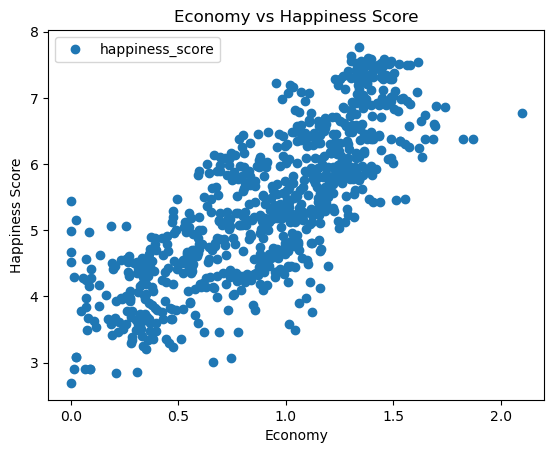

In [7]:
# Create a scatterplot using matplotlib to show the relationship between Economy and Happiness Score


df.plot(x = 'economy', y='happiness_score',style='o')
plt.title('Economy vs Happiness Score')  
plt.xlabel('Economy')  
plt.ylabel('Happiness Score')  
plt.show()

## 4. Hypothesis - A country's Economy (GDP per capita) is significantly correlated with its happiness score.


## 5. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

### X - Independent Variable - Economy
### y - Dependent Variable - Happiness Score 


In [15]:
X = df['economy'].values.reshape(-1,1)
y = df['happiness_score'].values.reshape(-1,1)

In [12]:
X

array([[1.39651   ],
       [1.30232   ],
       [1.32548   ],
       [1.459     ],
       [1.32629   ],
       [1.29025   ],
       [1.32944   ],
       [1.33171   ],
       [1.25018   ],
       [1.33358   ],
       [1.22857   ],
       [0.95578   ],
       [1.33723   ],
       [1.02054   ],
       [1.39451   ],
       [0.98124   ],
       [1.56391   ],
       [1.33596   ],
       [1.30782   ],
       [1.42727   ],
       [1.26637   ],
       [1.36011   ],
       [1.04424   ],
       [1.52186   ],
       [1.06353   ],
       [1.32792   ],
       [1.10715   ],
       [1.69042   ],
       [1.27778   ],
       [1.05351   ],
       [1.17898   ],
       [1.06166   ],
       [0.91861   ],
       [0.9669    ],
       [1.39541   ],
       [1.23011   ],
       [1.2074    ],
       [1.29098   ],
       [1.55422   ],
       [0.99534   ],
       [1.21183   ],
       [0.76454   ],
       [0.74553   ],
       [0.63244   ],
       [1.16891   ],
       [1.27074   ],
       [1.24461   ],
       [0.864

In [13]:
y

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

## 6. Split the data into two sets: a training set and a test set.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 7. Regression analysis 

In [17]:
# creating a regression object

regression = LinearRegression()

In [18]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

## 8. Create a plot that shows the regression line on the test set.

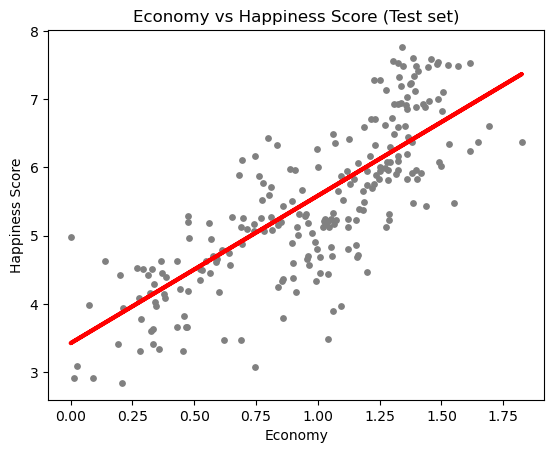

In [20]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Economy vs Happiness Score (Test set)')
plot_test.xlabel('Economy')
plot_test.ylabel('Happiness Score')
plot_test.show()

### There is a strong positive relation between a country's GDP per capita (economy) and its happiness score. This suggests that higher economic production per person is associated with higher happiness scores.

## 9. Check the model performance statistics—MSE and R2 score.

In [21]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [22]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.16337475]]
Mean squared error:  0.5039507249325367
R2 score:  0.6165274246667813


## 10. Compare the predicted y values with the actual y values in a dataframe.


In [23]:
y_predicted

array([[5.80609125],
       [6.44687622],
       [6.73379067],
       [6.43932604],
       [4.03947279],
       [5.92522839],
       [4.25537759],
       [5.02417608],
       [6.50613105],
       [5.98930082],
       [5.71924675],
       [5.94263683],
       [4.19912985],
       [5.39980284],
       [3.45557795],
       [6.36354302],
       [4.45263517],
       [5.37080656],
       [5.84749161],
       [5.27800314],
       [7.36905798],
       [3.58040467],
       [4.66425542],
       [6.36899473],
       [7.07949027],
       [6.39062848],
       [6.08126589],
       [6.4144256 ],
       [4.3550776 ],
       [6.35601448],
       [6.98988328],
       [6.53341121],
       [5.90436673],
       [3.83568289],
       [6.39928197],
       [5.60748681],
       [3.47872606],
       [5.6798517 ],
       [6.21586115],
       [6.04412074],
       [4.13691119],
       [6.44053022],
       [5.0341925 ],
       [5.71777566],
       [6.29976674],
       [6.12708616],
       [5.98175065],
       [5.179

In [24]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.525,5.806091
1,6.886,6.446876
2,6.344,6.733791
3,7.119,6.439326
4,3.781,4.039473
5,4.692,5.925228
6,4.390,4.255378
7,5.061,5.024176
8,6.929,6.506131
9,5.488,5.989301


## 11. Thoughts on how well the model performed on the test set 

The regression model appears to perform reasonably well based on the provided information. Let's interpret the metrics:

Slope:
The slope of the model is approximately 2.1634. This indicates that, on average, for a one-unit increase in the independent variable (Economy), the dependent variable (Happiness score) is expected to increase by approximately 2.1634 units. This positive slope suggests a positive correlation between Economy and Happiness score.


Mean Squared Error (MSE):
The mean squared error is a measure of the average squared difference between the actual and predicted values. In this case, the MSE is 0.5039, which is relatively low. Lower MSE values are desirable, indicating that, on average, the model's predictions are close to the actual values.


R2 Score:
The R-squared (R2) score is a measure of how well the model explains the variance in the dependent variable. An R2 score of 0.6165 suggests that the model accounts for approximately 61.65% of the variance in the Happiness score. This indicates a moderate level of explanatory power.
